# Problem 2

## Task 1: Benchmarking on Test Functions 

This task explores Nelder-Mead, Simulated Annealing, and Covariance Matrix Adaptation Evolution Strategy (CMA-ES). I will
 implement these optimization techniques and compare their performance on different objective functions.
 I'll use available libraries to apply the following optimization techniques:
 - Nelder-Mead (Simplex Method)
 - Simulated Annealing
 - CMA-ES (Covariance Matrix Adaptation Evolution Strategy)

In [ ]:
%pip install cma

In [49]:
import os
import time
import numpy as np
from scipy.optimize import minimize, dual_annealing
import cma
from cma import CMAEvolutionStrategy, CMAOptions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Visualizing the Benchmark Functions

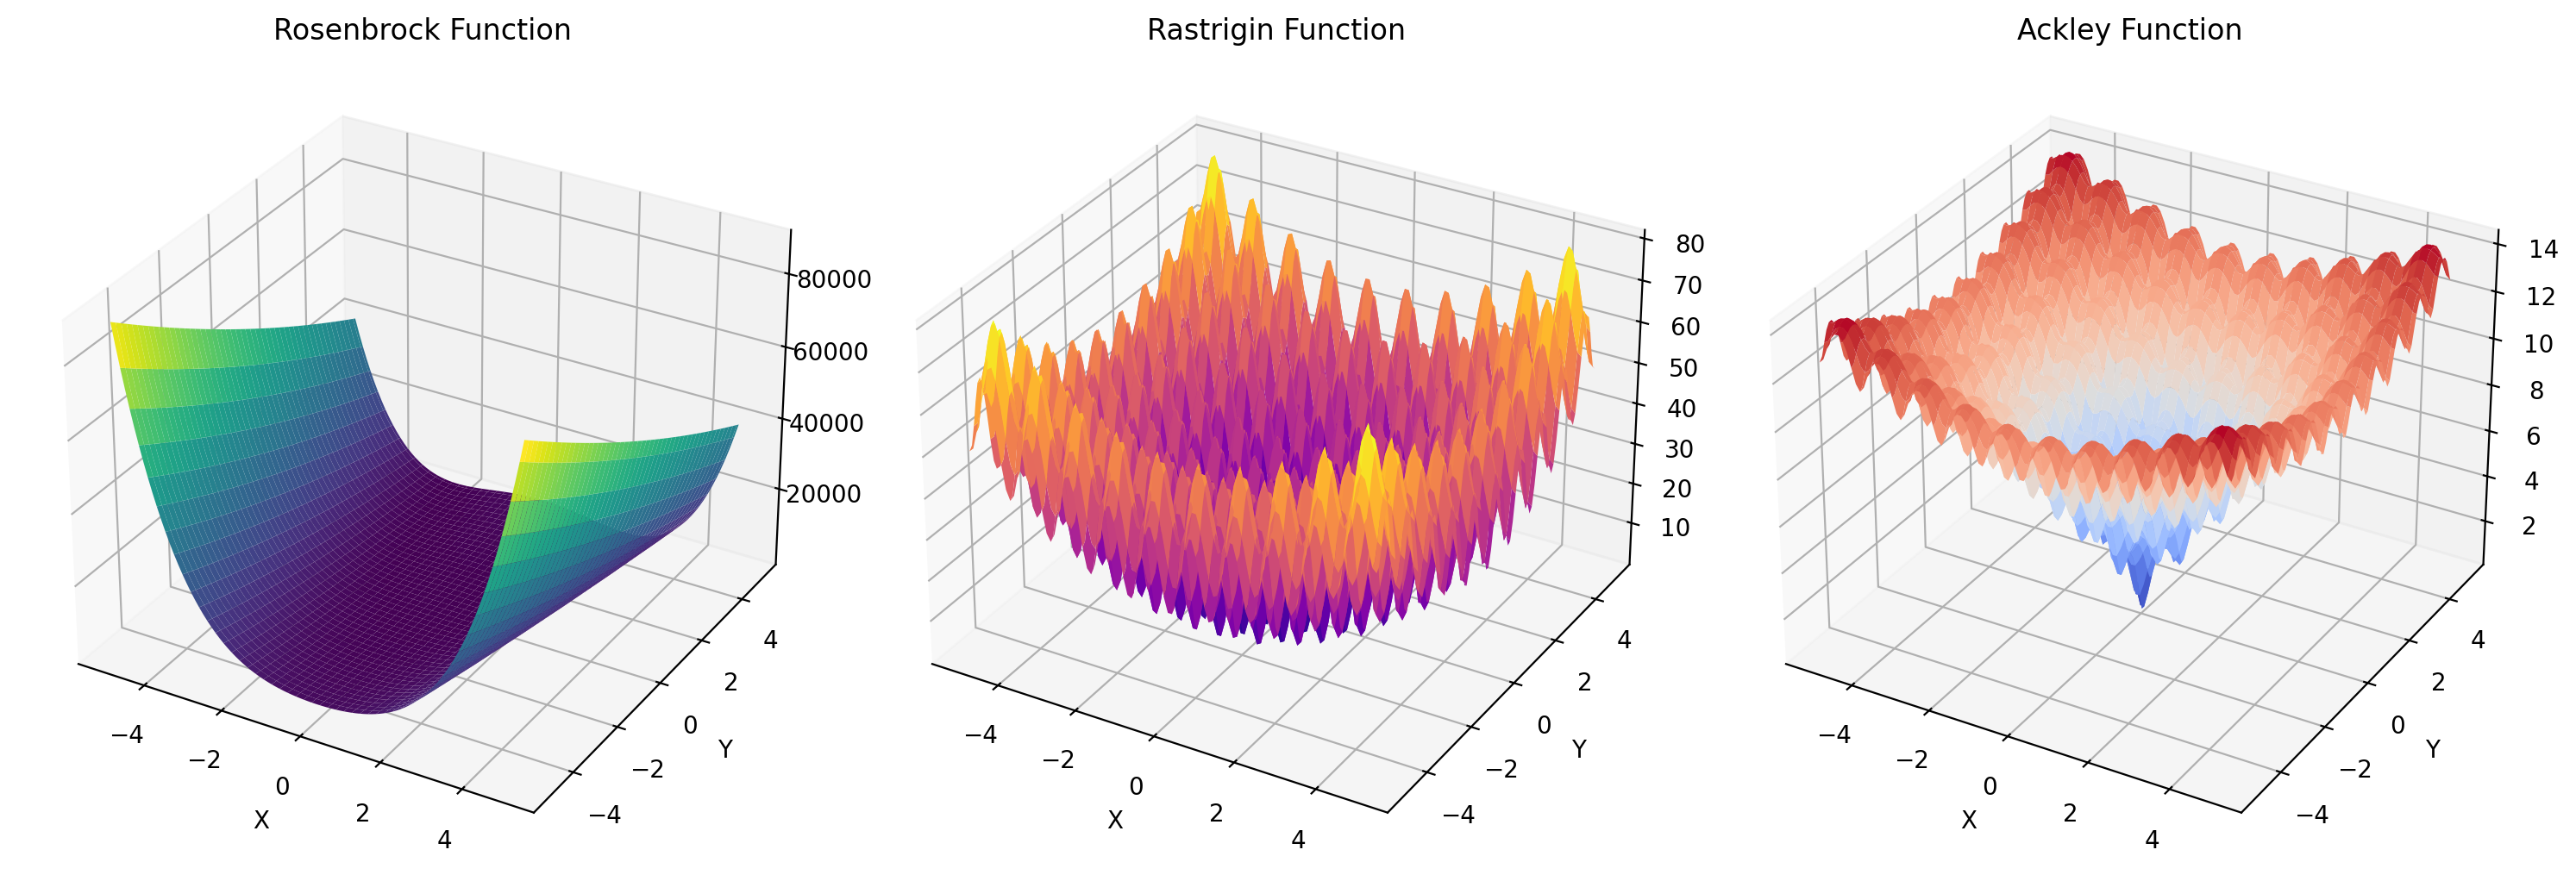

In [ ]:
# Define Rosenbrock function
def rosenbrock_3d(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Define Rastrigin function
def rastrigin_3d(x, y):
    A = 10
    return A * 2 + (x**2 - A * np.cos(2 * np.pi * x)) + (y**2 - A * np.cos(2 * np.pi * y))

# Define Ackley function
def ackley_3d(x, y):
    a = 20
    b = 0.2
    c = 2 * np.pi
    sum1 = x**2 + y**2
    sum2 = np.cos(c * x) + np.cos(c * y)
    return -a * np.exp(-b * np.sqrt(sum1 / 2)) - np.exp(sum2 / 2) + a + np.exp(1)

# Generate grid for plotting
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Compute function values
Z_rosenbrock = rosenbrock_3d(X, Y)
Z_rastrigin = rastrigin_3d(X, Y)
Z_ackley = ackley_3d(X, Y)

# Plot Rosenbrock function
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z_rosenbrock, cmap='viridis')
ax1.set_title('Rosenbrock Function')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Plot Rastrigin function
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, Z_rastrigin, cmap='plasma')
ax2.set_title('Rastrigin Function')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

# Plot Ackley function
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, Y, Z_ackley, cmap='coolwarm')
ax3.set_title('Ackley Function')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

plt.tight_layout()
plt.show()


---
##### **Rosenbrock Function**

$f(x, y) = (1 - x)^2 + 100(y - x^2)^2$

**Minimum:**
- **Point:** $(1, 1)$
- **Value:** $f(1, 1) = 0$



In [3]:
# Initial guesses 
x0 = np.array([-1, 1]) 
# For demonstration, I am using 2D problems; for Rastrigin and Ackley, we can extend to d dimensions.

In [4]:
# For Rosenbrock Function
def rosenbrock(x):
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2

# ----------------------
# 1. Nelder-Mead Method
# ----------------------
print("1. Nelder-Mead on Rosenbrock:")
start = time.time()
res_nm_rosen = minimize(rosenbrock, x0, method='Nelder-Mead',
                        options={'maxiter': 1000, 'disp': True})
print(res_nm_rosen)
print("Time taken by Nelder-Mead on Rosenbrock Function:", time.time() - start)
print("-"*80)

# --------------------------
# 2. Simulated Annealing
# --------------------------
start = time.time()
res_sa_rosen = dual_annealing(rosenbrock, bounds = [(-5, 5), (-5, 5)], maxiter=1000)
print("2. Simulated Annealing on Rosenbrock:\n", res_sa_rosen)
print("Time taken by Simulated Annealing on Rosenbrock Function:", time.time() - start)
print("-"*80)

# --------------------------
# 3. CMA-ES
# --------------------------
print("3. CMA-ES on Rosenbrock:")
start = time.time()
es = cma.CMAEvolutionStrategy(x0, 0.5, {'maxiter': 1000}) 
es.optimize(rosenbrock)
res_cma_rosen = es.result
print(res_cma_rosen)
print("Time taken by CMA-ES on Rosenbrock Function:", time.time() - start)
print("-"*80)

1. Nelder-Mead on Rosenbrock:
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 100
         Function evaluations: 187
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.0575902202767407e-10
             x: [ 1.000e+00  1.000e+00]
           nit: 100
          nfev: 187
 final_simplex: (array([[ 1.000e+00,  1.000e+00],
                       [ 1.000e+00,  1.000e+00],
                       [ 1.000e+00,  1.000e+00]]), array([ 4.058e-10,  2.648e-09,  3.011e-09]))
Time taken by Nelder-Mead on Rosenbrock Function: 0.014006376266479492
--------------------------------------------------------------------------------
2. Simulated Annealing on Rosenbrock:
  message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: 9.021738028974407e-12
       x: [ 1.000e+00  1.000e+00]
     nit: 1000
    nfev: 4157
    njev: 52
    nhev: 0
Time taken by Simulated Annealing 

**Comparison of Optimization Methods on Rosenbrock Function**

| Method                 | Iterations | Function Evaluations | Final Function Value | Accuracy     | Convergence Speed           | Time Taken (s) |
|------------------------|------------|------------------------|-----------------------|---------------|------------------------------|----------------|
| **Nelder-Mead**        | 100        | 187                    | `4.06e-10`            | High          | **Very Fast**          | **0.014**      |
| **Simulated Annealing**| 1000       | 4157                   | `9.02e-12`            | Very High     | Moderate        | 0.254            |
| **CMA-ES**             | 115        | 690                    | `1.73e-16`            | **Best**      | Slow  | 0.859          |


---
##### **Rastrigin Function**

$f(x) = 10d + \sum_{i=1}^{d} \left[ x_i^2 - 10\cos(2\pi x_i) \right]$

**Minimum:**
- **Point:** $(0, 0, \dots, 0)$
- **Value:** $f(0, 0, \dots, 0) = 0$

In [5]:
# For Rastrigin Function
def rastrigin(x):
    A = 10
    d = len(x)
    return A * d + sum(xi**2 - A * np.cos(2 * np.pi * xi) for xi in x)

# ----------------------
# 1. Nelder-Mead Method
# ----------------------
print("1. Nelder-Mead on Rastrigin:")
start = time.time()
res_nm_rastrigin = minimize(rastrigin, x0, method='Nelder-Mead',
                            options={'maxiter': 1000, 'disp': True})
print(res_nm_rastrigin)
print("Time taken by Nelder-Mead on Rastrigin Function:", time.time() - start)
print("-" * 80)

# --------------------------
# 2. Simulated Annealing
# --------------------------
bounds = [(-5.12, 5.12), (-5.12, 5.12)]  # Rastrigin is usually defined in this range
start = time.time()
res_sa_rastrigin = dual_annealing(rastrigin, bounds=bounds, maxiter=1000)
print("2. Simulated Annealing on Rastrigin:\n", res_sa_rastrigin)
print("Time taken by Simulated Annealing on Rastrigin Function:", time.time() - start)
print("-" * 80)

# --------------------------
# 3. CMA-ES
# --------------------------
print("3. CMA-ES on Rastrigin:")
start = time.time()
es = cma.CMAEvolutionStrategy(x0, 0.5, {'maxiter': 1000}) 
es.optimize(rastrigin)
res_cma_rastrigin = es.result
print(res_cma_rastrigin)
print("Time taken by CMA-ES on Rastrigin Function:", time.time() - start)
print("-" * 80)

1. Nelder-Mead on Rastrigin:
Optimization terminated successfully.
         Current function value: 1.989918
         Iterations: 23
         Function evaluations: 45
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.9899183768497082
             x: [-9.950e-01  9.950e-01]
           nit: 23
          nfev: 45
 final_simplex: (array([[-9.950e-01,  9.950e-01],
                       [-9.950e-01,  9.949e-01],
                       [-9.949e-01,  9.950e-01]]), array([ 1.990e+00,  1.990e+00,  1.990e+00]))
Time taken by Nelder-Mead on Rastrigin Function: 0.007294893264770508
--------------------------------------------------------------------------------
2. Simulated Annealing on Rastrigin:
  message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: 1.0658141036401503e-14
       x: [-5.729e-09 -5.018e-09]
     nit: 1000
    nfev: 4064
    njev: 21
    nhev: 0
Time taken by Simulated Annealing on Rastrig

**Comparison of Optimization Methods on Rastrigin Function**

| Method                  | Iterations | Function Evaluations | Final Function Value | Accuracy     | Convergence Speed | Time Taken (s) |
|-------------------------|------------|----------------------|----------------------|--------------|--------------------------------|----------------|
| **Nelder-Mead**         | 23         | 45                   | `1.99e+00`           | Low          | **Very Fast**                  | **0.0073**     |
| **Simulated Annealing** | 1000       | 4064                 | `9.02e-12`           | Very High    | **Moderate**                   | 0.284          |
| **CMA-ES**              | 89         | 534                  | `9.95e-01`           | Moderate     | **Slow**                       | 0.708          |


---
##### **Ackley Function**

$f(x) = -20 \exp\left(-0.2 \sqrt{\frac{1}{d} \sum_{i=1}^{d} x_i^2} \right) - \exp\left( \frac{1}{d} \sum_{i=1}^{d} \cos(2\pi x_i) \right) + 20 + e$

**Minimum:**
- **Point:** $(0, 0, \dots, 0)$
- **Value:** $f(0, 0, \dots, 0) = 0$

In [6]:
# For Ackley Function
def ackley(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    d = len(x)
    sum_sq = sum(xi**2 for xi in x)
    sum_cos = sum(np.cos(c * xi) for xi in x)
    term1 = -a * np.exp(-b * np.sqrt(sum_sq / d))
    term2 = -np.exp(sum_cos / d)
    return term1 + term2 + a + np.e

# ----------------------
# 1. Nelder-Mead Method
# ----------------------
print("1. Nelder-Mead on Ackley:")
start = time.time()
res_nm_ackley = minimize(ackley, x0, method='Nelder-Mead',
                         options={'maxiter': 1000, 'disp': True})
print(res_nm_ackley)
print("Time taken by Nelder-Mead on Ackley Function:", time.time() - start)
print("-" * 80)

# --------------------------
# 2. Simulated Annealing
# --------------------------
bounds = [(-5, 5), (-5, 5)]  # Ackley is usually defined in this range
start = time.time()
res_sa_ackley = dual_annealing(ackley, bounds=bounds, maxiter=1000)
print("2. Simulated Annealing on Ackley:\n", res_sa_ackley)
print("Time taken by Simulated Annealing on Ackley Function:", time.time() - start)
print("-" * 80)

# --------------------------
# 3. CMA-ES
# --------------------------
print("3. CMA-ES on Ackley:")
start = time.time()
es = cma.CMAEvolutionStrategy(x0, 0.5, {'maxiter': 1000})
es.optimize(ackley)
res_cma_ackley = es.result
print(res_cma_ackley)
print("Time taken by CMA-ES on Ackley Function:", time.time() - start)
print("-" * 80)


1. Nelder-Mead on Ackley:
Optimization terminated successfully.
         Current function value: 3.574452
         Iterations: 24
         Function evaluations: 47
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 3.574451924990758
             x: [-9.685e-01  9.685e-01]
           nit: 24
          nfev: 47
 final_simplex: (array([[-9.685e-01,  9.685e-01],
                       [-9.684e-01,  9.684e-01],
                       [-9.685e-01,  9.686e-01]]), array([ 3.574e+00,  3.574e+00,  3.574e+00]))
Time taken by Nelder-Mead on Ackley Function: 0.005720615386962891
--------------------------------------------------------------------------------
2. Simulated Annealing on Ackley:
  message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: 9.702408210188196e-09
       x: [-6.077e-13 -3.430e-09]
     nit: 1000
    nfev: 4316
    njev: 105
    nhev: 0
Time taken by Simulated Annealing on Ackley Function: 

**Comparison of Optimization Methods on Ackley Function**

| Method                  | Iterations | Function Evaluations | Final Function Value | Accuracy     | Convergence Speed | Time Taken (s) |
|-------------------------|------------|----------------------|----------------------|--------------|--------------------------------|----------------|
| **Nelder-Mead**         | 24         | 47                   | `3.57e+00`           | Low          | **Very Fast**                  | **0.0057**     |
| **Simulated Annealing** | 1000       | 4316                 | `9.70e-09`           | Very High    | **Moderate**                   | 0.339          |
| **CMA-ES**              | 116        | 696                  | `1.46e-12`           | **Best**     | **Slow**                       | 0.860          |


Note: The simulated annealing algorithm stops after exactly maxiter iterations unless interrupted earlier by other criteria. The [source code](https://github.com/scipy/scipy/blob/v1.15.2/scipy/optimize/_dual_annealing.py#L0-L1) does not implement tolerance-based convergence checks (e.g., small changes in function value or parameters). That's why it is always reaching maxiter=1000 for all benchmark functions.

### Visualizing the performance

In [14]:
final_points = {
    "Rosenbrock": {
        "Nelder-Mead": tuple(res_nm_rosen.x),
        "Simulated Annealing": tuple(res_sa_rosen.x),
        "CMA-ES": tuple(res_cma_rosen.xbest)
    },
    "Rastrigin": {
        "Nelder-Mead": tuple(res_nm_rastrigin.x),
        "Simulated Annealing": tuple(res_sa_rastrigin.x),
        "CMA-ES": tuple(res_cma_rastrigin.xbest)
    },
    "Ackley": {
        "Nelder-Mead": tuple(res_nm_ackley.x),
        "Simulated Annealing": tuple(res_sa_ackley.x),
        "CMA-ES": tuple(res_cma_ackley.xbest)
    }
}

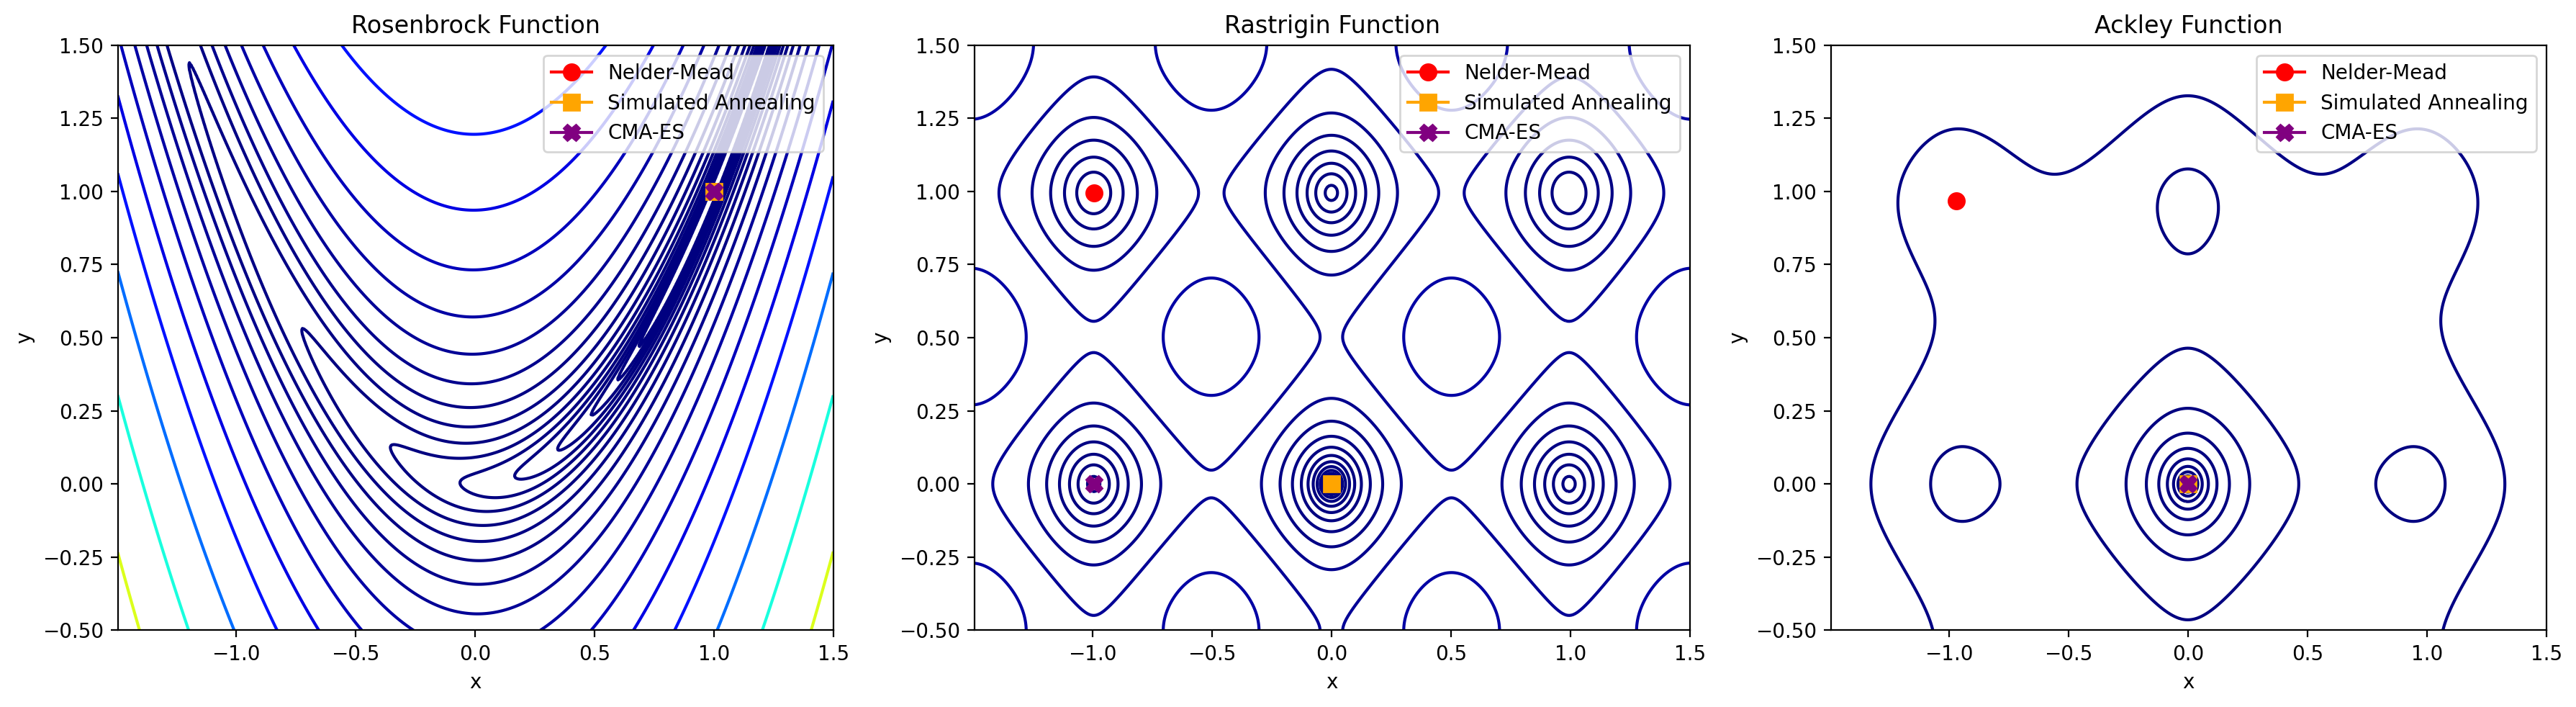

In [ ]:
# Determine overall plot bounds based on all solution points
all_x = []
all_y = []
for func_points in final_points.values():
    for x, y in func_points.values():
        all_x.append(x)
        all_y.append(y)

x_min, x_max = min(all_x) - 0.5, max(all_x) + 0.5
y_min, y_max = min(all_y) - 0.5, max(all_y) + 0.5

# Create a meshgrid over dynamic bounds
x = np.linspace(x_min, x_max, 400)
y = np.linspace(y_min, y_max, 400)
X, Y = np.meshgrid(x, y)

# Define plotting function
def plot_contour(ax, func, title, points):
    Z = func(X, Y)
    cp = ax.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='jet')
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    colors = {'Nelder-Mead': 'red', 'Simulated Annealing': 'orange', 'CMA-ES': 'purple'}
    markers = {'Nelder-Mead': 'o', 'Simulated Annealing': 's', 'CMA-ES': 'X'}
    
    for method, (px, py) in points.items():
        ax.plot(px, py, marker=markers[method], color=colors[method],
                markersize=8, label=method)

    ax.legend()

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

plot_contour(axs[0], rosenbrock_3d, 'Rosenbrock Function', final_points['Rosenbrock'])
plot_contour(axs[1], rastrigin_3d, 'Rastrigin Function', final_points['Rastrigin'])
plot_contour(axs[2], ackley_3d, 'Ackley Function', final_points['Ackley'])

plt.tight_layout()
plt.show()

### Inferences

- **Nelder-Mead**: Fastest to converge, lowest function evaluations, but slightly less accurate.  
- **Simulated Annealing**: Took the longest (1000 iterations), required the most function evaluations, but found a good solution.  
- **CMA-ES**: Found the **most accurate** solution with the least number of iterations, but required more function evaluations than Nelder-Mead.

 - Nelder-Mead is simple and works well in low dimensions, but might be trapped in local minima for nonconvex functions.
 - Simulated Annealing can escape local minima but may converge slowly.
 - CMA-ES tends to be robust for nonconvex, multimodal problems (like Rastrigin and Ackley) at the cost of higher computational overhead.


## Task 2: Hyperparameter Tuning in Machine Learning

In [16]:
import numpy as np
import time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.optimize import minimize, dual_annealing
import cma

# Basic configuration
N_TRAIN = 1500      # Smaller subset for speed
N_TEST = 500
MAX_EVALS = 30     # Fewer evaluations for faster runs
RANDOM_SEED = 42
N_RUNS = 3
KERNELS = ['linear', 'rbf', 'poly'] 

np.random.seed(RANDOM_SEED)

In [8]:
# Load MNIST
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False, parser='liac-arff')
X, y = mnist["data"], mnist["target"].astype(np.uint8)

# Simple subsetting
X_sample = X[:N_TRAIN + N_TEST]
y_sample = y[:N_TRAIN + N_TEST]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, train_size=N_TRAIN, test_size=N_TEST, random_state=RANDOM_SEED
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (1500, 784)
Test data shape: (500, 784)
Training labels shape: (1500,)
Test labels shape: (500,)


In [39]:
detailed_results = {k: {opt_name: [] for opt_name in ["Nelder-Mead", "Simulated Annealing", "CMA-ES"]} for k in KERNELS}

overall_best_accuracy = -1.0
overall_best_info = {} # Stores info about the single best run across all kernels/optimizers/runs

# Loop through each kernel
for kernel_name in KERNELS:
    print(f"\n===== Optimizing for Kernel: {kernel_name.upper()} =====")

    # Define Objective Function specific to this kernel
    def svm_objective(log_params):
        C = 10**log_params[0]
        gamma = 'scale'
        if kernel_name != 'linear':
            if len(log_params) < 2: return 1.0
            gamma = 10**log_params[1]
        model = SVC(kernel=kernel_name, C=C, gamma=gamma, random_state=RANDOM_SEED)
        model.fit(X_train_scaled, y_train)
        accuracy = model.score(X_test_scaled, y_test)
        return 1.0 - accuracy

    # Define Search Space for this kernel
    if kernel_name == 'linear':
        bounds = [(-2, 3)]
        initial_guess = np.array([0.0])
    else:
        bounds = [(-2, 3), (-4, 1)]
        initial_guess = np.array([0.0, -1.0])

    # Loop through optimizers
    optimizers = ["Nelder-Mead", "Simulated Annealing", "CMA-ES"]
    for opt_name in optimizers:
        print(f"  Running {opt_name} ({N_RUNS} times)...")

        # Loop for multiple runs
        for run_num in range(N_RUNS):
            # Use a different random seed for each optimizer run to test stability
            current_run_seed = np.random.randint(0, 2**31 - 1)

            print(f"    Run {run_num+1}/{N_RUNS} (Seed: {current_run_seed})...", end="")
            start_t = time.time()
            res = None
            evals = 0
            cost = 1.0
            params_log = initial_guess

            # Run the specific optimizer with the current seed
            if opt_name == "Nelder-Mead":
                 res = minimize(svm_objective, initial_guess, method='Nelder-Mead', options={'maxfev': MAX_EVALS, 'adaptive': True})
                 evals = res.nfev
                 cost = res.fun
                 params_log = res.x
            elif opt_name == "Simulated Annealing":
                 res = dual_annealing(svm_objective, bounds=bounds, maxfun=MAX_EVALS, seed=current_run_seed) # Use run-specific seed
                 evals = res.nfev
                 cost = res.fun
                 params_log = res.x
            elif opt_name == "CMA-ES":
                 sigma0 = 0.5
                 opts = CMAOptions()
                 opts.set('maxfevals', MAX_EVALS)
                 opts.set('bounds', [[b[0] for b in bounds], [b[1] for b in bounds]])
                 opts.set('verbose', -9)
                 opts.set('seed', current_run_seed) # Use run-specific seed

                 es = CMAEvolutionStrategy(initial_guess, sigma0, opts)
                 es.optimize(svm_objective)

                 if es.result.fbest is not None:
                     cost = es.result.fbest
                     params_log = es.result.xbest
                     evals = es.result.evaluations

            acc = 1.0 - cost
            end_t = time.time()
            run_time = end_t - start_t
            print(f" Acc: {acc:.4f} (Evals: {evals}, Time: {run_time:.1f}s)")

            # Store result for this specific run
            run_result = {
                'run': run_num + 1,
                'accuracy': acc,
                'params_log': params_log,
                'evals': evals,
                'time': run_time,
                'seed': current_run_seed
            }
            detailed_results[kernel_name][opt_name].append(run_result)

            # Check if this run is the best overall single run found so far
            if acc > overall_best_accuracy:
                overall_best_accuracy = acc
                overall_best_info = {
                    'kernel': kernel_name,
                    'optimizer': opt_name,
                    **run_result # Include all details from this best run
                }

print("\n===== Optimization Finished =====")


===== Optimizing for Kernel: LINEAR =====
  Running Nelder-Mead (3 times)...
    Run 1/3 (Seed: 1470349574)... Acc: 0.8780 (Evals: 5, Time: 4.1s)
    Run 2/3 (Seed: 753219849)... Acc: 0.8780 (Evals: 5, Time: 3.9s)
    Run 3/3 (Seed: 357319767)... Acc: 0.8780 (Evals: 5, Time: 3.7s)
  Running Simulated Annealing (3 times)...
    Run 1/3 (Seed: 1352770574)... Acc: 0.8800 (Evals: 30, Time: 25.4s)
    Run 2/3 (Seed: 1132509158)... Acc: 0.8840 (Evals: 30, Time: 25.6s)
    Run 3/3 (Seed: 1679800787)... Acc: 0.8840 (Evals: 30, Time: 27.4s)
  Running CMA-ES (3 times)...
    Run 1/3 (Seed: 1046539129)... Acc: 0.8780 (Evals: 4, Time: 3.7s)
    Run 2/3 (Seed: 297207804)... Acc: 0.8780 (Evals: 4, Time: 3.6s)
    Run 3/3 (Seed: 2033453988)... Acc: 0.8780 (Evals: 4, Time: 3.8s)

===== Optimizing for Kernel: RBF =====
  Running Nelder-Mead (3 times)...
    Run 1/3 (Seed: 2018777777)... Acc: 0.8960 (Evals: 30, Time: 83.3s)
    Run 2/3 (Seed: 1013805649)... Acc: 0.8960 (Evals: 30, Time: 82.2s)
    Run 

## Task 3: Performance Analysis and Visualization 

In [40]:
print("\nStability Analysis (Based on {} Runs)".format(N_RUNS))
print("-" * 85)
print(f"{'Kernel':<10} | {'Optimizer':<20} | {'Avg Acc':<10} | {'Std Acc':<10} | {'Avg Evals':<10} | {'Std Evals':<10}")
print("-" * 85)

summary_stats = {}

for kernel_name, kernel_data in detailed_results.items():
    summary_stats[kernel_name] = {}
    for opt_name, run_list in kernel_data.items():
        if not run_list: continue # Skip if no results for this combo

        accuracies = [r['accuracy'] for r in run_list]
        evaluations = [r['evals'] for r in run_list]

        avg_acc = np.mean(accuracies)
        std_acc = np.std(accuracies)
        avg_evals = np.mean(evaluations)
        std_evals = np.std(evaluations)

        summary_stats[kernel_name][opt_name] = {
            'avg_acc': avg_acc, 'std_acc': std_acc,
            'avg_evals': avg_evals, 'std_evals': std_evals
        }

        print(f"{kernel_name:<10} | {opt_name:<20} | {avg_acc:<10.4f} | {std_acc:<10.4f} | {avg_evals:<10.1f} | {std_evals:<10.1f}")


Stability Analysis (Based on 3 Runs)
-------------------------------------------------------------------------------------
Kernel     | Optimizer            | Avg Acc    | Std Acc    | Avg Evals  | Std Evals 
-------------------------------------------------------------------------------------
linear     | Nelder-Mead          | 0.8780     | 0.0000     | 5.0        | 0.0       
linear     | Simulated Annealing  | 0.8827     | 0.0019     | 30.0       | 0.0       
linear     | CMA-ES               | 0.8780     | 0.0000     | 4.0        | 0.0       
rbf        | Nelder-Mead          | 0.8960     | 0.0000     | 30.0       | 0.0       
rbf        | Simulated Annealing  | 0.8913     | 0.0034     | 30.0       | 0.0       
rbf        | CMA-ES               | 0.8900     | 0.0114     | 36.0       | 0.0       
poly       | Nelder-Mead          | 0.8660     | 0.0000     | 30.0       | 0.0       
poly       | Simulated Annealing  | 0.8660     | 0.0000     | 30.0       | 0.0       
poly       | CMA

---
Low 'Std Acc' indicates stable accuracy results across runs.

Low 'Std Evals' indicates consistent computational effort.

In [41]:
print("\n--- Overall Best Single Run Found ---")

if overall_best_info:
    # Decode final parameters for display
    final_params_log = overall_best_info['params_log']
    final_C = 10**final_params_log[0]
    param_str = f"C={final_C:.3e}"
    if len(final_params_log) > 1:
        final_gamma = 10**final_params_log[1]
        param_str += f", gamma={final_gamma:.3e}"

    print(f"Achieved in Run: {overall_best_info['run']} (Seed: {overall_best_info['seed']})")
    print(f"Kernel:      {overall_best_info['kernel'].upper()}")
    print(f"Optimizer:   {overall_best_info['optimizer']}")
    print(f"Accuracy:    {overall_best_info['accuracy']:.4f}")
    print(f"Evaluations: {overall_best_info['evals']}")
    print(f"Parameters:  {param_str}")


--- Overall Best Single Run Found ---
Achieved in Run: 2 (Seed: 2119848506)
Kernel:      RBF
Optimizer:   CMA-ES
Accuracy:    0.9000
Evaluations: 36
Parameters:  C=7.242e+01, gamma=1.351e-03


In [ ]:
# # Landscape Generation 
# print("  Generating landscape grid...")
# log_C_mesh, log_gamma_mesh = np.meshgrid(np.linspace(-2, 3, 15), np.linspace(-4, 1, 15))
# cost_grid = np.array([svm_objective_rbf_plot([c, g])
#                       for c, g in zip(log_C_mesh.ravel(), log_gamma_mesh.ravel())]).reshape(log_C_mesh.shape)



Hyperparameter Search Landscape Visualization
Generating landscape for rbf kernel...
Evaluating cost across grid ...
  ...evaluated point 20/100
  ...evaluated point 40/100
  ...evaluated point 60/100
  ...evaluated point 80/100
  ...evaluated point 100/100
Grid evaluation finished in 305.9s.


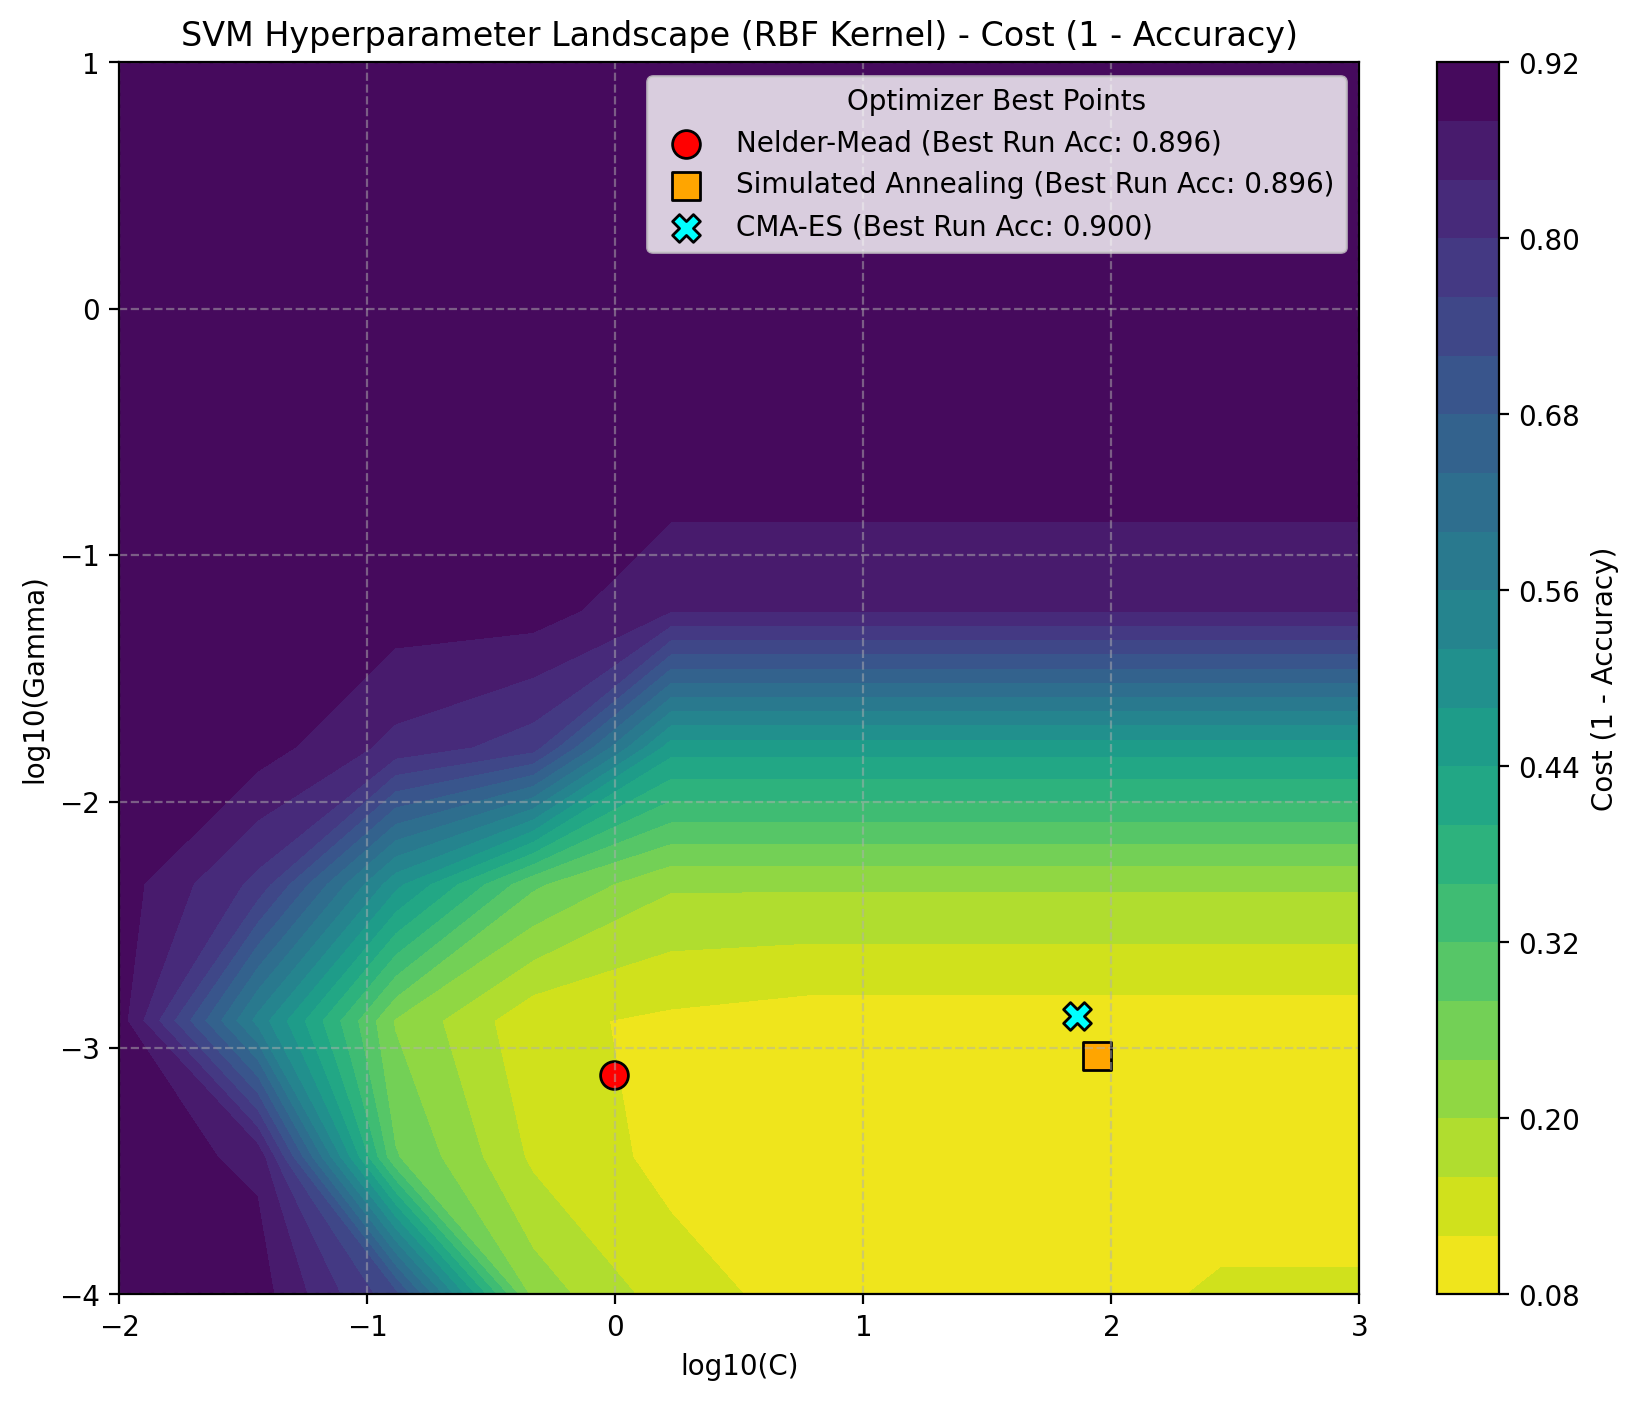

In [42]:
print("Hyperparameter Search Landscape Visualization")
print("Generating landscape for rbf kernel...")
# Define Grid for C and Gamma (Log Scale)
log_C_range = np.linspace(bounds[0][0], bounds[0][1], 10) 
log_gamma_range = np.linspace(bounds[1][0], bounds[1][1], 10) 
log_C_mesh, log_gamma_mesh = np.meshgrid(log_C_range, log_gamma_range)

# Calculate Cost (1 - Accuracy) on the Grid
cost_grid = np.zeros_like(log_C_mesh)

# Re-define objective for the specific kernel (needed for grid evaluation)
def svm_objective_grid(log_params):
        C = 10**log_params[0]
        gamma = 10**log_params[1] # Assumes non-linear kernel here
        model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=RANDOM_SEED)
        model.fit(X_train_scaled, y_train)
        accuracy = model.score(X_test_scaled, y_test)
        return 1.0 - accuracy

print("Evaluating cost across grid ...")
start_grid_time = time.time()
for i in range(log_C_mesh.shape[0]):
    for j in range(log_C_mesh.shape[1]):
        current_log_params = [log_C_mesh[i, j], log_gamma_mesh[i, j]]
        cost_grid[i, j] = svm_objective_grid(current_log_params)
        if (i * log_C_mesh.shape[1] + j + 1) % 20 == 0: # Print progress
                print(f"  ...evaluated point {i * log_C_mesh.shape[1] + j + 1}/{log_C_mesh.size}")
print(f"Grid evaluation finished in {time.time() - start_grid_time:.1f}s.")


# Plotting
plt.figure(figsize=(10, 8))
contour = plt.contourf(log_C_mesh, log_gamma_mesh, cost_grid, levels=20, cmap='viridis_r') 
plt.colorbar(contour, label='Cost (1 - Accuracy)')

# Overlay Optimizer Results
colors = {'Nelder-Mead': 'red', 'Simulated Annealing': 'orange', 'CMA-ES': 'cyan'}
markers = {'Nelder-Mead': 'o', 'Simulated Annealing': 's', 'CMA-ES': 'X'}

# Plot the best point found by each optimizer for this kernel across all runs
for opt_name, run_list in detailed_results['rbf'].items():
    if not run_list: continue
    # Find the run with the highest accuracy for this optimizer/kernel
    best_run_for_opt = max(run_list, key=lambda r: r['accuracy'])
    best_params_log = best_run_for_opt['params_log']
    plt.scatter(best_params_log[0], best_params_log[1],
                marker=markers[opt_name], color=colors[opt_name], s=100, edgecolor='black',
                label=f"{opt_name} (Best Run Acc: {best_run_for_opt['accuracy']:.3f})")

plt.xlabel("log10(C)")
plt.ylabel("log10(Gamma)")
plt.title(f"SVM Hyperparameter Landscape ({'rbf'.upper()} Kernel) - Cost (1 - Accuracy)")
plt.legend(title="Optimizer Best Points")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [43]:
# Plotting the optimization trajectories for the best kernel (rbf) found in the previous step

start_point = np.array([0.0, -1.0]) 
plot_bounds = [(-2, 3), (-4, 1)]    

# Objective Function 
def svm_objective_rbf_plot(log_params):
    C = 10**log_params[0]
    gamma = 10**log_params[1]
    model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=RANDOM_SEED)
    model.fit(X_train_scaled, y_train)
    accuracy = model.score(X_test_scaled, y_test)
    return 1.0 - accuracy

# Store Trajectories
trajectories = {}
final_solutions = {}

# Nelder-Mead (Simplified trajectory capture)
res_nm = minimize(svm_objective_rbf_plot, start_point, method='Nelder-Mead',
                  options={'maxfev': 30, 'return_all': True, 'adaptive': True})
#'allvecs' contains all simplex vertices evaluated
trajectories['Nelder-Mead'] = np.array(res_nm.allvecs) if hasattr(res_nm, 'allvecs') and res_nm.allvecs else np.array([start_point])
final_solutions['Nelder-Mead'] = res_nm.x

# Simulated Annealing (Callback for trajectory)
sa_traj = [np.copy(start_point)] # Start with initial point
def sa_callback_plot(x, f, context):
    sa_traj.append(np.copy(x)) # Append accepted points
res_sa = dual_annealing(svm_objective_rbf_plot, bounds=plot_bounds, maxfun=30,
                        x0=start_point, seed=123, callback=sa_callback_plot)
trajectories['SA'] = np.array(sa_traj)
final_solutions['SA'] = res_sa.x

# CMA-ES 
cma_traj = [np.copy(start_point)] # Start with initial point
es = CMAEvolutionStrategy(start_point, 0.5, {'maxfevals': 30, 'seed': 123, 'verbose': -9, 'bounds': [[-2, -4],[3, 1]]})
eval_count_cma = 0
while not es.stop() and eval_count_cma < 30:
    solutions = es.ask()
    eval_count_cma += len(solutions) # Approximate total evals
    es.tell(solutions, [svm_objective_rbf_plot(s) for s in solutions])
    if es.best is not None: cma_traj.append(np.copy(es.best.x)) # Store best point each generation
trajectories['CMA-ES'] = np.array(cma_traj)
final_solutions['CMA-ES'] = es.result.xbest if es.result.xbest is not None else start_point

  Generating 2D Plot...


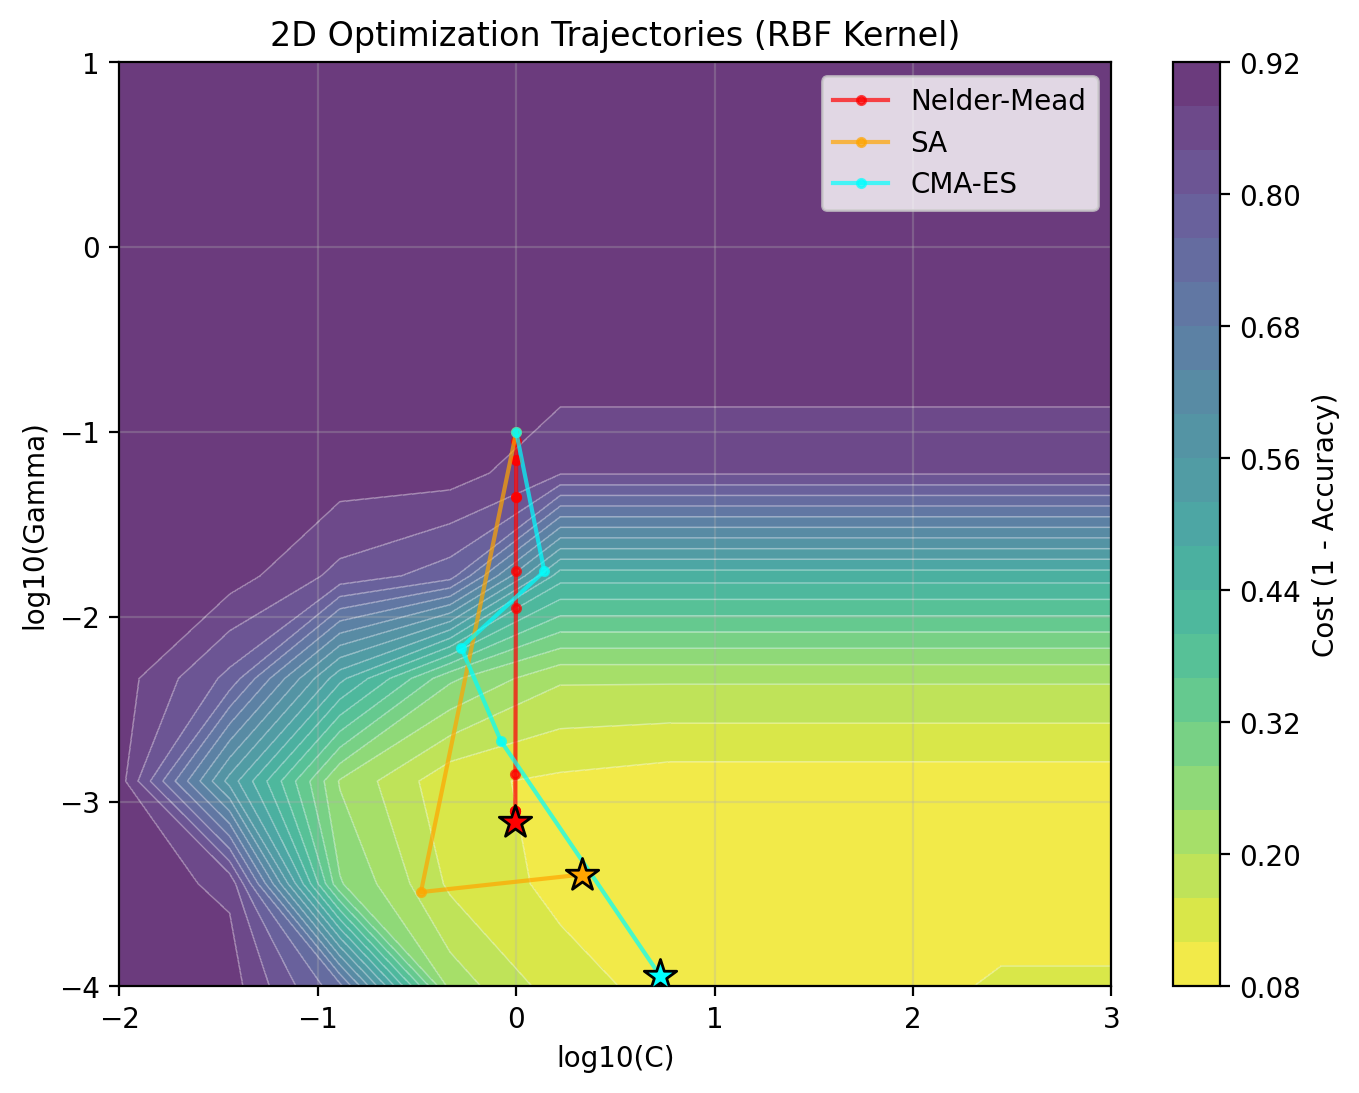

In [44]:
# 2D Trajectory Plot
print("  Generating 2D Plot...")
plt.figure(figsize=(8, 6))
plt.contourf(log_C_mesh, log_gamma_mesh, cost_grid, levels=20, cmap='viridis_r', alpha=0.8)
plt.colorbar(label='Cost (1 - Accuracy)')
plt.contour(log_C_mesh, log_gamma_mesh, cost_grid, levels=plt.gca().get_children()[0].levels, colors='white', linewidths=0.5, alpha=0.5)

colors = {'Nelder-Mead': 'red', 'SA': 'orange', 'CMA-ES': 'cyan'}
for key, traj in trajectories.items():
    if traj.ndim == 2 and traj.shape[1] == 2: # Basic check
        plt.plot(traj[:, 0], traj[:, 1], marker='.', linestyle='-', color=colors.get(key, 'black'), alpha=0.7, label=key)
        plt.scatter(final_solutions[key][0], final_solutions[key][1], marker='*', s=150, color=colors.get(key, 'black'), edgecolor='black', zorder=5) # Mark end point

plt.legend()
plt.title('2D Optimization Trajectories (RBF Kernel)')
plt.xlabel('log10(C)')
plt.ylabel('log10(Gamma)')
plt.grid(True, alpha=0.3)
plt.show()

In [50]:
import plotly.graph_objects as go

filename_prefix = "rbf_trajectories"

fig = go.Figure()

# Add surface plot
fig.add_trace(go.Surface(
    x=log_C_mesh,
    y=log_gamma_mesh,
    z=cost_grid,
    colorscale='Viridis',
    opacity=0.4,
    showscale=False
))

# Add trajectory lines and final points
for key, traj in trajectories.items():
    if traj.ndim == 2 and traj.shape[1] == 2:
        z_costs = np.array([svm_objective_rbf_plot(p) for p in traj])

        # Trajectory line
        fig.add_trace(go.Scatter3d(
            x=traj[:, 0],
            y=traj[:, 1],
            z=z_costs,
            mode='lines+markers',
            marker=dict(size=4),
            line=dict(width=2),
            name=key
        ))

        # Final point
        final_point = final_solutions[key]
        final_z = svm_objective_rbf_plot(final_point)
        fig.add_trace(go.Scatter3d(
            x=[final_point[0]],
            y=[final_point[1]],
            z=[final_z],
            mode='markers',
            marker=dict(
                symbol='diamond', size=4,
                color=colors.get(key, 'black'),
                line=dict(color='black', width=1)
            ),
            name=f"{key} Final"
        ))

# Update layout
fig.update_layout(
    title='3D Optimization Trajectories (RBF Kernel)',
    scene=dict(
        xaxis_title='log10(C)',
        yaxis_title='log10(Gamma)',
        zaxis_title='Cost'
    ),
    legend=dict(x=0.8, y=0.9),
    margin=dict(l=0, r=0, t=50, b=0)
)

# Save to HTML file
os.makedirs("plots", exist_ok=True)
html_path = f"plots/{filename_prefix}.html"
fig.write_html(html_path)
print(f"Saved interactive plot to: {html_path}")

# Show the plot in the notebook
fig.show()


Saved interactive plot to: plots/rbf_trajectories.html


[![RBF Optimization](plots/rbf_trajectories.png)](https://adi776borate.github.io/CS303-DiffusionMaps-Optimization-Assignment/plots/rbf_trajectories.html)

Evaluating final model performance using best parameters found:
 Kernel=RBF, Optimizer=CMA-ES, Run=1
Training final model with best parameters...
Evaluating final model on the test set...

Final Model Test Accuracy: 0.9000

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        47
           1       0.97      0.98      0.98        64
           2       0.74      0.93      0.83        46
           3       0.89      0.83      0.86        47
           4       0.94      0.91      0.93        56
           5       0.91      0.80      0.85        50
           6       0.93      0.89      0.91        44
           7       0.88      0.92      0.90        50
           8       0.97      0.90      0.94        41
           9       0.86      0.87      0.86        55

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90      

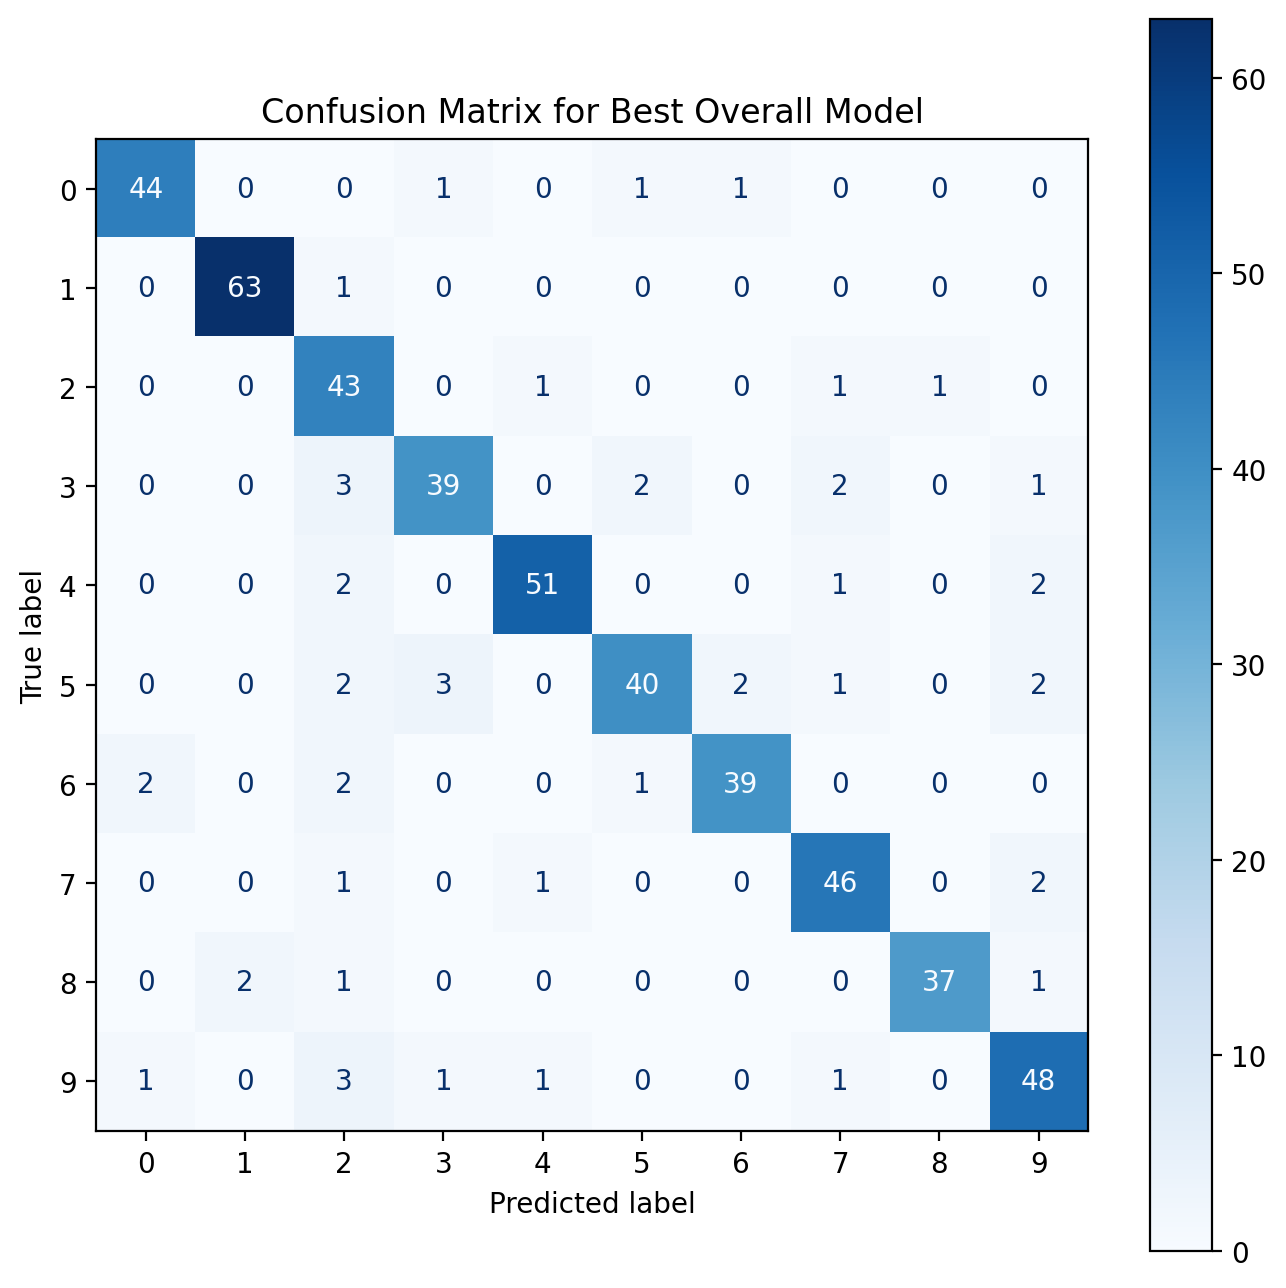

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(f"Evaluating final model performance using best parameters found:")
print(f" Kernel={overall_best_info['kernel'].upper()}, Optimizer={overall_best_info['optimizer']}, Run={overall_best_info['run']}")
    
#  Retrieve Best Parameters 
best_kernel = overall_best_info['kernel']
best_params_log = overall_best_info['params_log']
best_C = 10**best_params_log[0]
best_gamma = 'scale'
if best_kernel != 'linear':
    best_gamma = 10**best_params_log[1]

#  Train the Final Best Model 
print("Training final model with best parameters...")
final_model = SVC(kernel=best_kernel, C=best_C, gamma=best_gamma, random_state=RANDOM_SEED)
final_model.fit(X_train_scaled, y_train)

#  Evaluate on Test Set 
print("Evaluating final model on the test set...")
y_pred_final = final_model.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, y_pred_final)

print(f"\nFinal Model Test Accuracy: {final_accuracy:.4f}")

#  Classification Report 
print("\nClassification Report:")
target_names = [str(i) for i in range(10)]
report = classification_report(y_test, y_pred_final, target_names=target_names)
print(report)

#  Confusion Matrix 
print("Generating Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues', values_format='d') 
plt.title("Confusion Matrix for Best Overall Model")
plt.show()